# Validation methods

In this notebook we train a k nearest neighbors classificer on the (real) dataset for breast tumour instances. We show how the hyperparameters can be tuned using each of the methodologies we have discussed.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

C:\Users\frbj\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Here we load and investigate the data:

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

### Train-test methodology

In [3]:
# Divide the data into training and test
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

We train several k-nearest-neighbor models on the data with various values of k, and plot the train and test accuracies:

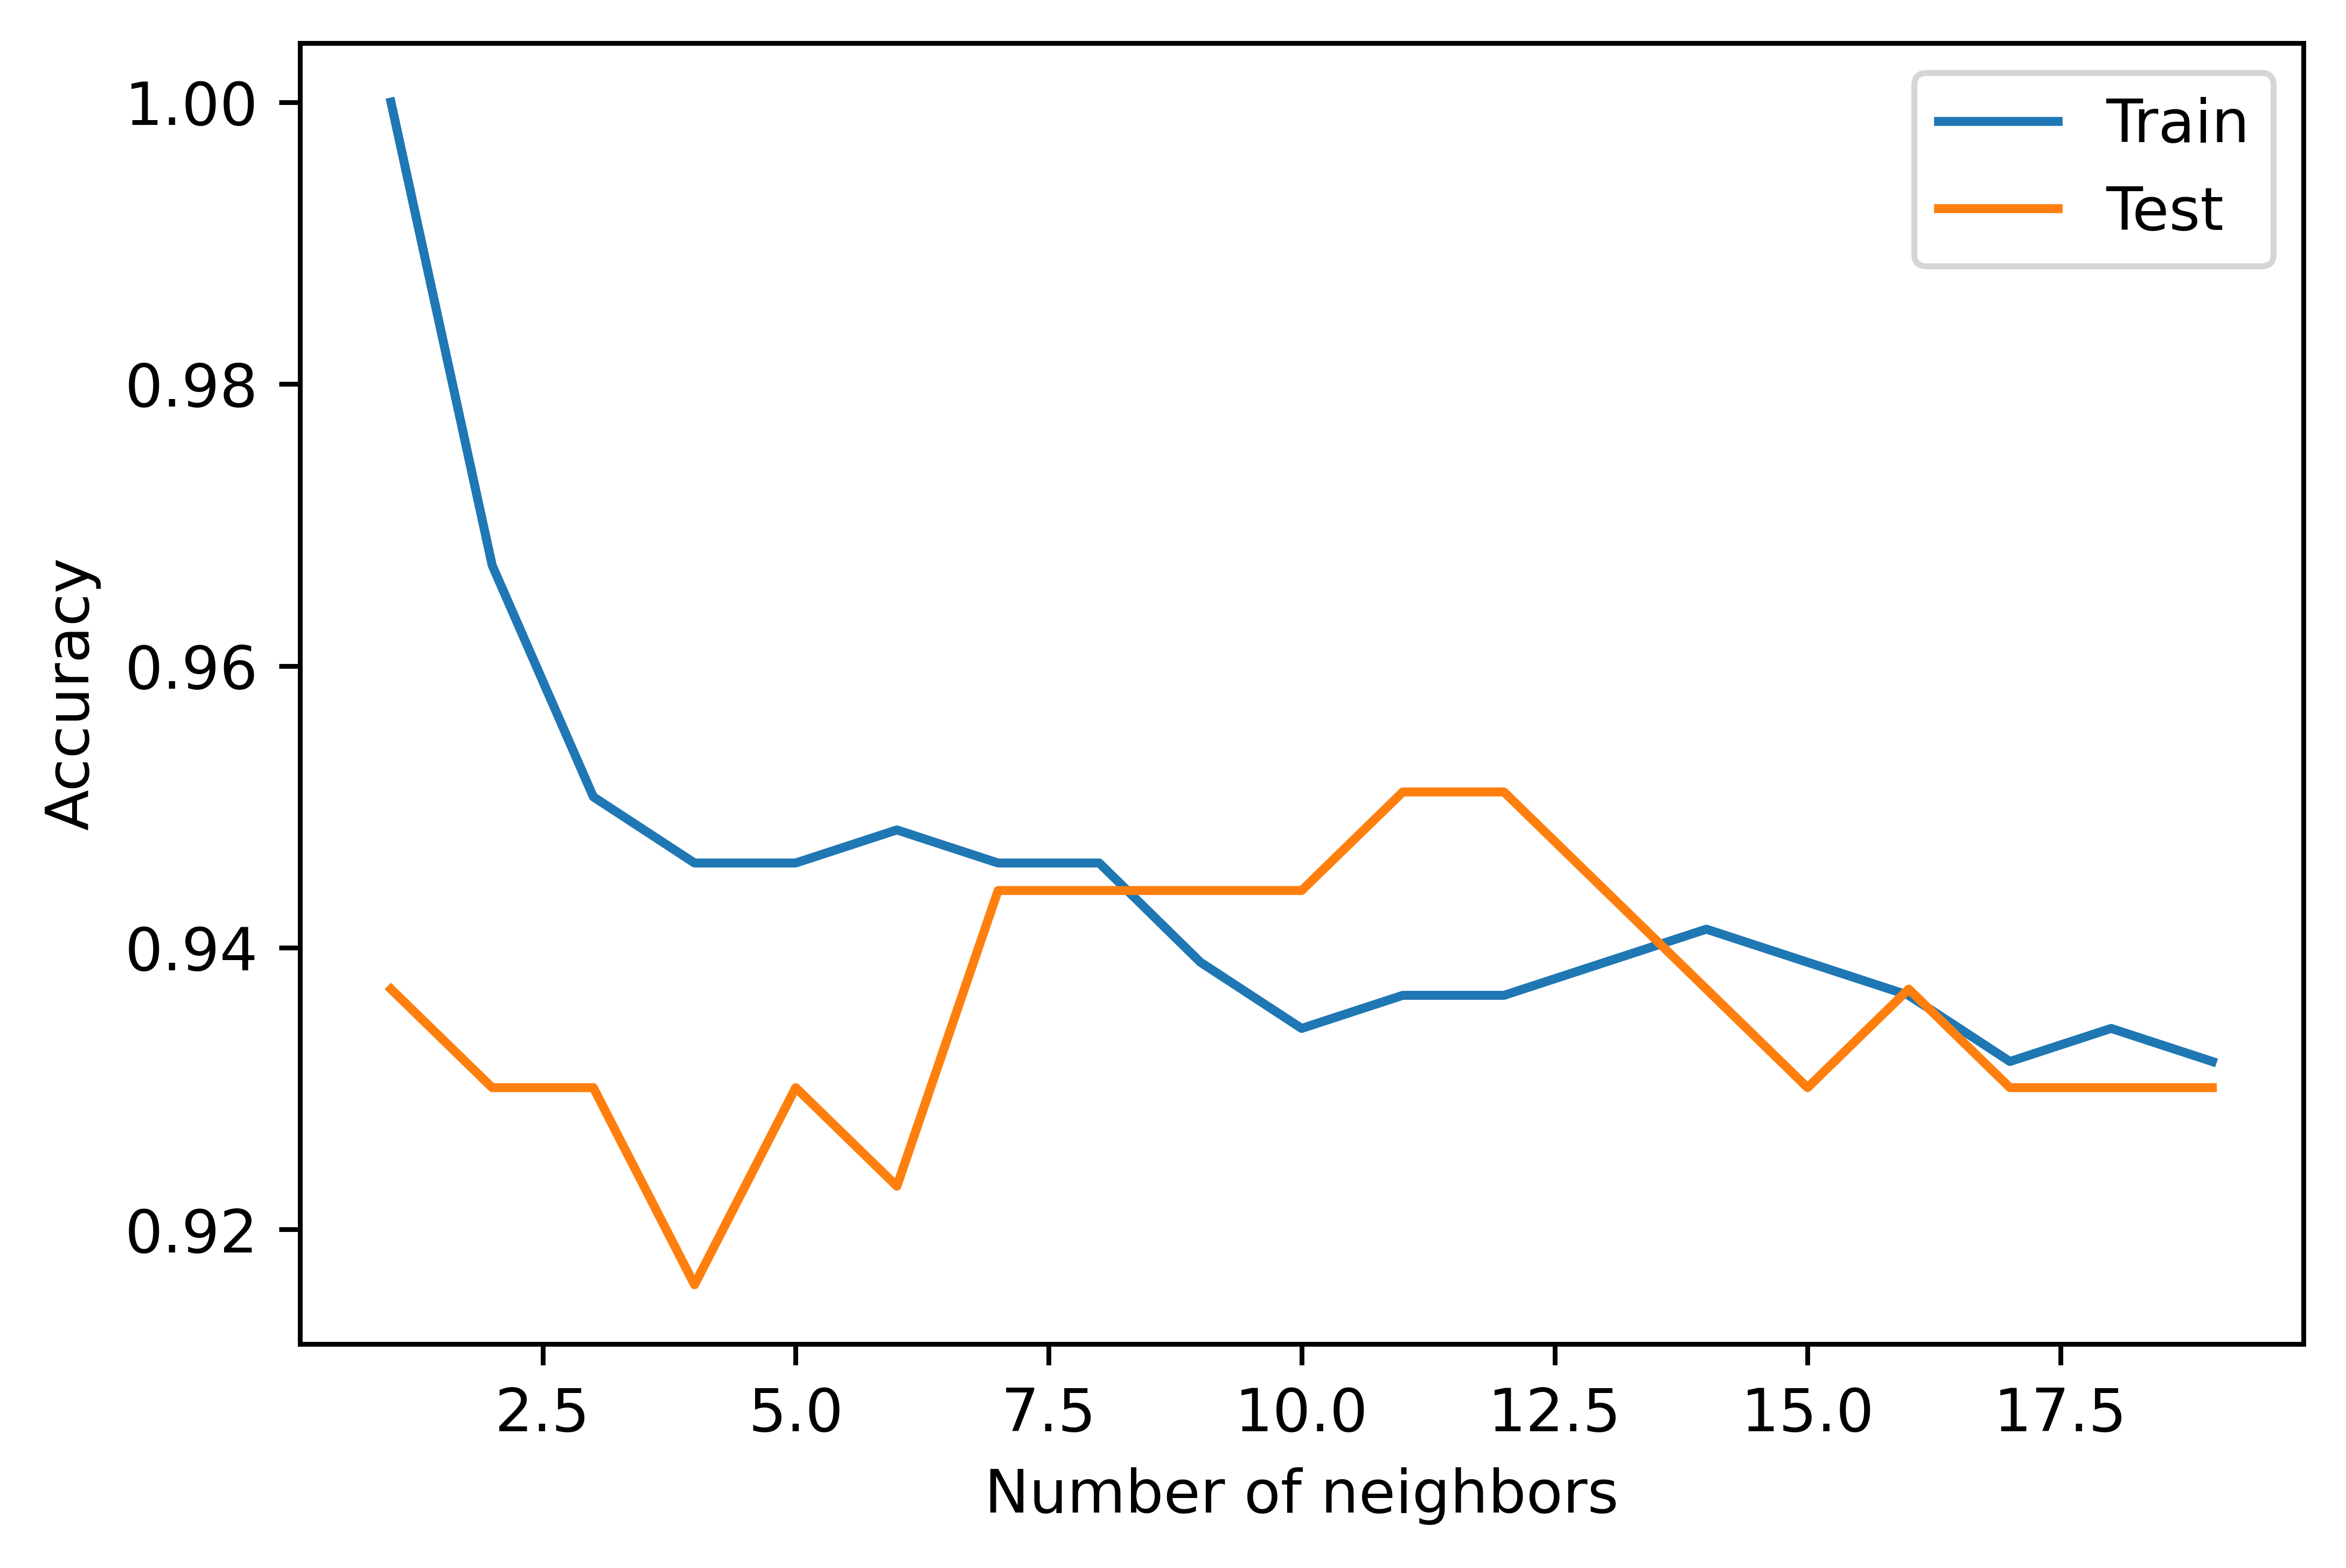

In [8]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 20
neighbors_settings = range(1,20)

for n in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.figure(dpi = 800)
plt.plot(neighbors_settings, training_accuracy, label = "Train")
plt.plot(neighbors_settings, test_accuracy, label = "Test")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors")
plt.legend()
plt.show()


The graph shows that we achieve a good trade-off between high accuracy and low overfitting around n_neighbors = 11 or 12, so this is probably one of these values we should use for our final model! 

### Train-validation-test methodology

Divide the data into training data, validation data, and test data

In [9]:
X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, stratify = y_trainval, random_state = 43)

print("Size of train set: {}".format(X_train.shape[0]))
print("Size of val set: {}".format(X_val.shape[0]))
print("Size of test set: {}".format(X_test.shape[0]))


Size of train set: 319
Size of val set: 107
Size of test set: 143


Find the best number of neighbors using the validation set

In [12]:
best_score = 0
for num_neighbors in range(1,15):
    knn = KNeighborsClassifier(n_neighbors = num_neighbors)
    knn.fit(X_train, y_train)
    
    score = knn.score(X_val, y_val)
    
    if score > best_score:
        best_score = score
        best_num_neighbors = num_neighbors
        
#build a final model on train + val set
knn = KNeighborsClassifier(n_neighbors = best_num_neighbors)
knn.fit(X_trainval, y_trainval)

print("Best n_neighbors: {}".format(best_num_neighbors))
print("Best score on val set: {}".format(best_score))
print("Score on train/val set: {}".format(knn.score(X_trainval, y_trainval)))
print("Score on test set: {}".format(knn.score(X_test, y_test)))

Best n_neighbors: 14
Best score on val set: 0.9345794392523364
Score on train/val set: 0.9413145539906104
Score on test set: 0.9370629370629371


### Cross-validation

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
# Fix the parameter space
parameters = {'n_neighbors': range(1,15)}
grid_search = GridSearchCV(KNeighborsClassifier(), 
                           parameters, cv = 5, return_train_score = True)

# To do leave-one-out cross-validation instead, uncomment the following:
### from sklearn.model_selection import LeaveOneOut
### loo = LeaveOneOut()
### grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv=loo, return_train_score=True)

Divide the data into training data and test data (no validation data!)

In [16]:
# Divide into train and test
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

Perform the search; all results are stored within `grid_search`

In [17]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 15)}, return_train_score=True)

Print some results

In [18]:
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best cross-validation score: {}".format(grid_search.best_score_))
print("Best estimator: {}".format(grid_search.best_estimator_))

Test score: 0.93
Best cross-validation score: 0.9365526675786594
Best estimator: KNeighborsClassifier()


This automatic grid search is extremely helpful when we have more than one hyperparameter - such as in a decision tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
